In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
data=pd.read_csv('Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
columns=data.columns
columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [5]:
columns_map={}
for column in columns:
    new_column=column.replace(' ','_')
    columns_map[column]=new_column

data=data.rename(columns=columns_map)

In [6]:
data.isnull().sum()

ID                                               0
Date_House_was_Sold                              0
Sale_Price                                       4
No_of_Bedrooms                                   0
No_of_Bathrooms                                  4
Flat_Area_(in_Sqft)                              9
Lot_Area_(in_Sqft)                               9
No_of_Floors                                     0
Waterfront_View                                  0
No_of_Times_Visited                          19489
Condition_of_the_House                           0
Overall_Grade                                    0
Area_of_the_House_from_Basement_(in_Sqft)        3
Basement_Area_(in_Sqft)                          0
Age_of_House_(in_Years)                          0
Renovated_Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living_Area_after_Renovation_(i

# Data exploration and pre-processing

In [7]:
#Treating outliers
data['Sale_Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale_Price, dtype: float64

In [8]:
q1=data['Sale_Price'].quantile(0.25)
q3=data['Sale_Price'].quantile(0.75)
iqr=q3-q1
iqr

323050.0

In [9]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [10]:
def limit_imputer(value):
    if value < lower_limit:
        return lower_limit
    if value > upper_limit:
        return upper_limit
    else:
        return value

In [11]:
data['Sale_Price']=data['Sale_Price'].apply(limit_imputer)

In [12]:
data['Sale_Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale_Price, dtype: float64

In [13]:
data.dropna(inplace=True,axis=0,subset=['Sale_Price'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date_House_was_Sold                        21609 non-null  object 
 2   Sale_Price                                 21609 non-null  float64
 3   No_of_Bedrooms                             21609 non-null  int64  
 4   No_of_Bathrooms                            21605 non-null  float64
 5   Flat_Area_(in_Sqft)                        21600 non-null  float64
 6   Lot_Area_(in_Sqft)                         21600 non-null  float64
 7   No_of_Floors                               21609 non-null  float64
 8   Waterfront_View                            21609 non-null  object 
 9   No_of_Times_Visited                        2124 non-null   object 
 10  Condition_of_the_House     

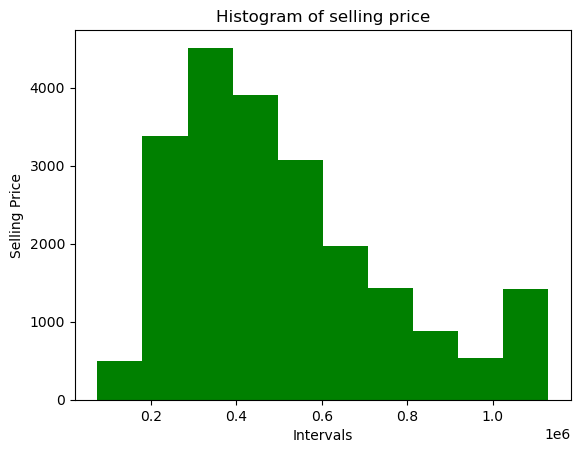

In [15]:
plt.hist(data['Sale_Price'],bins=10,color='green')
plt.xlabel('Intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of selling price')
plt.show()

In [16]:
#skewed towards lower values

In [17]:
data=data.drop(['No_of_Times_Visited'],axis=1)

In [18]:
Numerical_columns=['No_of_Bathrooms','Flat_Area_(in_Sqft)','Lot_Area_(in_Sqft)','Area_of_the_House_from_Basement_(in_Sqft)',
                  'Latitude','Longitude','Living_Area_after_Renovation_(in_Sqft)']

In [19]:
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[Numerical_columns]=Imputer.fit_transform(data[Numerical_columns])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date_House_was_Sold                        21609 non-null  object 
 2   Sale_Price                                 21609 non-null  float64
 3   No_of_Bedrooms                             21609 non-null  int64  
 4   No_of_Bathrooms                            21609 non-null  float64
 5   Flat_Area_(in_Sqft)                        21609 non-null  float64
 6   Lot_Area_(in_Sqft)                         21609 non-null  float64
 7   No_of_Floors                               21609 non-null  float64
 8   Waterfront_View                            21609 non-null  object 
 9   Condition_of_the_House                     21609 non-null  object 
 10  Overall_Grade              

In [21]:
# zipcode still has a missing value

In [22]:
data['Zipcode'].shape

(21609,)

In [23]:
column=data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [24]:
Imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=Imputer.fit_transform(column)

In [25]:
data['Zipcode']=data['Zipcode'].astype(object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date_House_was_Sold                        21609 non-null  object 
 2   Sale_Price                                 21609 non-null  float64
 3   No_of_Bedrooms                             21609 non-null  int64  
 4   No_of_Bathrooms                            21609 non-null  float64
 5   Flat_Area_(in_Sqft)                        21609 non-null  float64
 6   Lot_Area_(in_Sqft)                         21609 non-null  float64
 7   No_of_Floors                               21609 non-null  float64
 8   Waterfront_View                            21609 non-null  object 
 9   Condition_of_the_House                     21609 non-null  object 
 10  Overall_Grade              

In [27]:
data['Ever_Renovated']=np.where(data['Renovated_Year'] == 0,'No','Yes')

In [28]:
data['Purchase_Year']=pd.DatetimeIndex(data['Date_House_was_Sold']).year

In [29]:
data['Years_Since_Renovation']=np.where(data['Ever_Renovated'] == 'Yes',abs(data['Renovated_Year']-data['Purchase_Year']),0)

In [30]:
data.drop(columns=['Purchase_Year','Date_House_was_Sold','Renovated_Year'],inplace=True)

In [31]:
data.head()

,ID,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,Condition_of_the_House,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),Ever_Renovated,Years_Since_Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [32]:
data.drop(columns=['ID'],inplace=True)

In [33]:
data['Condition_of_the_House'].value_counts()

Condition_of_the_House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition_of_the_House'>

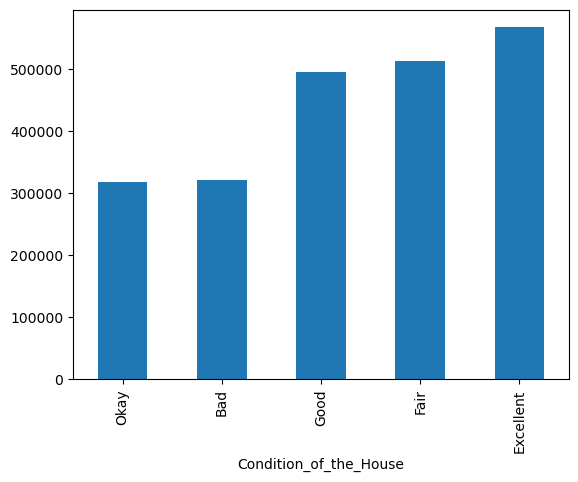

In [34]:
data.groupby('Condition_of_the_House')['Sale_Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Waterfront_View'>

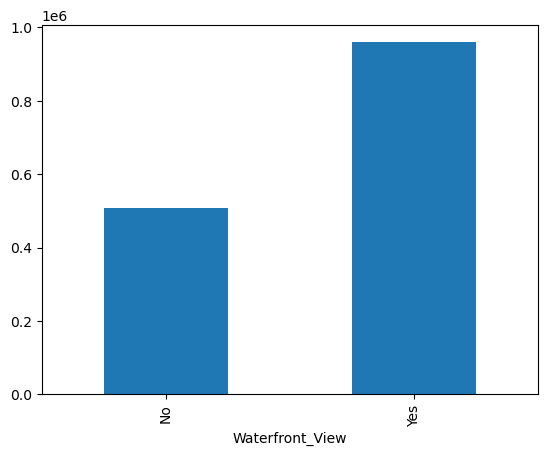

In [35]:
data.groupby('Waterfront_View')['Sale_Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Ever_Renovated'>

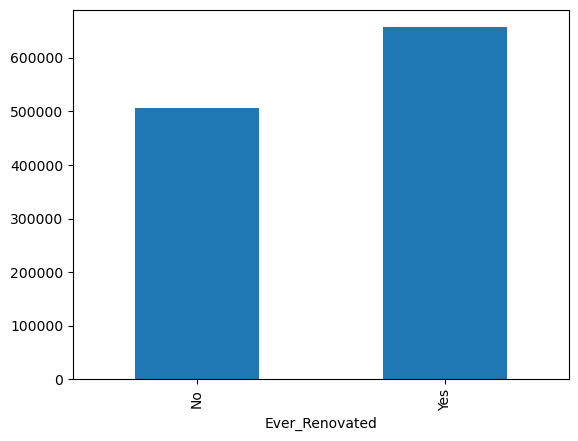

In [36]:
data.groupby('Ever_Renovated')['Sale_Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Zipcode'>

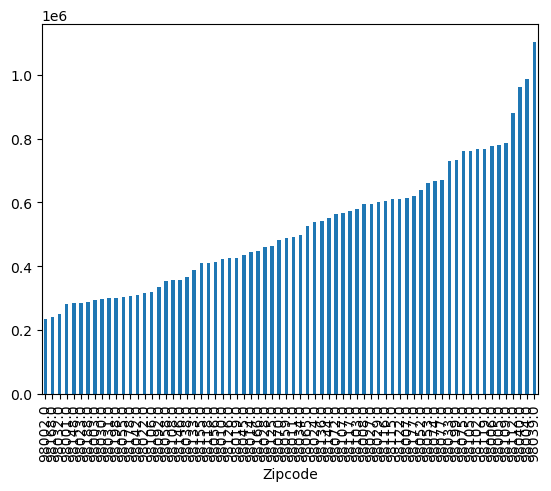

In [37]:
data.groupby('Zipcode')['Sale_Price'].mean().sort_values().plot(kind='bar')

In [38]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [39]:
mod=ols('Sale_Price ~ Condition_of_the_House', data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [40]:
#F-value is high, PR < 0.05, Thus accept alternate hypothesis

mod=ols('Sale_Price ~ Waterfront_View', data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [41]:
mod=ols('Sale_Price ~ Ever_Renovated', data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [42]:
mod=ols('Sale_Price ~ Zipcode', data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


In [43]:
# hence these categorical variables have an impact on the target variable

In [44]:
data=pd.get_dummies(data,columns=['Condition_of_the_House'],drop_first=True)

In [45]:
data=pd.get_dummies(data,columns=['Ever_Renovated','Waterfront_View'],drop_first=True)

In [46]:
data.head()

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),...,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),Years_Since_Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,-122.257,1340.0,5650,0,False,True,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,-122.319,1690.0,7639,26,False,True,False,False,True,False
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,-122.233,2720.0,8062,0,False,True,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,-122.393,1360.0,5000,0,True,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,-122.045,1800.0,7503,0,False,True,False,False,False,False


In [47]:
#Binning zipcode column because it has 71 levels
zip_table=pd.DataFrame({})
zip_table['mean_sale']=data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price')
zip_table.head()

,mean_sale
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [48]:
zip_table['Zipcode_group']=pd.cut(zip_table['mean_sale'],bins=10,labels=['Zipcode_group_0','Zipcode_group_1','Zipcode_group_2',
                                                                         'Zipcode_group_3','Zipcode_group_4','Zipcode_group_5','Zipcode_group_6',
                                                                         'Zipcode_group_7','Zipcode_group_8','Zipcode_group_9'],include_lowest=True)

In [49]:
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [50]:
data=pd.get_dummies(data,columns=['Zipcode_group'],drop_first=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No_of_Bedrooms                             21609 non-null  int64  
 2   No_of_Bathrooms                            21609 non-null  float64
 3   Flat_Area_(in_Sqft)                        21609 non-null  float64
 4   Lot_Area_(in_Sqft)                         21609 non-null  float64
 5   No_of_Floors                               21609 non-null  float64
 6   Overall_Grade                              21609 non-null  int64  
 7   Area_of_the_House_from_Basement_(in_Sqft)  21609 non-null  float64
 8   Basement_Area_(in_Sqft)                    21609 non-null  int64  
 9   Age_of_House_(in_Years)                    21609 non-null  int64  
 10  Zipcode                    

In [52]:
data=data.drop(columns='mean_sale')

In [53]:
data.shape

(21609, 31)

# Implementing model

In [54]:
data.head()

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,False,False,False,False,True,False,False,False,False,False


### Scaling the data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['Sale_Price']
X=scaler.fit_transform(data.drop(columns=['Sale_Price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)

### Checking and removing multicollinearity

In [56]:
k=X.corr()
k

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
No_of_Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.152760,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No_of_Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,-0.203951,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat_Area_(in_Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,-0.199380,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot_Area_(in_Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.129551,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No_of_Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,-0.059222,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
Overall_Grade,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,-0.185844,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area_of_the_House_from_Basement_(in_Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.261124,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement_Area_(in_Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.074933,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age_of_House_(in_Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.346928,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492
Zipcode,-0.152760,-0.203951,-0.199380,-0.129551,-0.059222,-0.185844,-0.261124,0.074933,0.346928,1.000000,...,0.030286,0.068410,0.075736,0.117422,-0.046753,0.079329,-0.095934,0.071470,-0.179854,-0.035049


In [57]:
# pairs of independent variables with correlation greater than 0.5
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i != j)]
z, len(z)

([['No_of_Bedrooms', 'No_of_Bathrooms'],
  ['No_of_Bedrooms', 'Flat_Area_(in_Sqft)'],
  ['No_of_Bathrooms', 'No_of_Bedrooms'],
  ['No_of_Bathrooms', 'Flat_Area_(in_Sqft)'],
  ['No_of_Bathrooms', 'No_of_Floors'],
  ['No_of_Bathrooms', 'Overall_Grade'],
  ['No_of_Bathrooms', 'Area_of_the_House_from_Basement_(in_Sqft)'],
  ['No_of_Bathrooms', 'Living_Area_after_Renovation_(in_Sqft)'],
  ['Flat_Area_(in_Sqft)', 'No_of_Bedrooms'],
  ['Flat_Area_(in_Sqft)', 'No_of_Bathrooms'],
  ['Flat_Area_(in_Sqft)', 'Overall_Grade'],
  ['Flat_Area_(in_Sqft)', 'Area_of_the_House_from_Basement_(in_Sqft)'],
  ['Flat_Area_(in_Sqft)', 'Living_Area_after_Renovation_(in_Sqft)'],
  ['Lot_Area_(in_Sqft)', 'Lot_Area_after_Renovation_(in_Sqft)'],
  ['No_of_Floors', 'No_of_Bathrooms'],
  ['No_of_Floors', 'Area_of_the_House_from_Basement_(in_Sqft)'],
  ['Overall_Grade', 'No_of_Bathrooms'],
  ['Overall_Grade', 'Flat_Area_(in_Sqft)'],
  ['Overall_Grade', 'Area_of_the_House_from_Basement_(in_Sqft)'],
  ['Overall_Grade', 

In [58]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

# Calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No_of_Bedrooms                                  1.633183
No_of_Bathrooms                                 3.373947
Flat_Area_(in_Sqft)                          1481.739793
Lot_Area_(in_Sqft)                              2.105774
No_of_Floors                                    2.143248
Overall_Grade                                   2.955386
Area_of_the_House_from_Basement_(in_Sqft)    1205.612547
Basement_Area_(in_Sqft)                       345.453572
Age_of_House_(in_Years)                         2.683895
Zipcode                                         1.820970
Latitude                                        2.521410
Longitude                                       2.023888
Living_Area_after_Renovation_(in_Sqft)          2.995316
Lot_Area_after_Renovation_(in_Sqft)             2.144361
Years_Since_Renovation                          2.788015
Condition_of_the_House_Excellent               53.577387
Condition_of_the_House_Fair                   166.143201
Condition_of_the_House_Good    

In [59]:
# Removing features with mc > 5
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],' has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present")
        return data

In [60]:
for i in range(7):
    vif_data=MC_remover(vif_data)

Flat_Area_(in_Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


In [61]:
# Calculating vif for remaining columns
vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
vif,len(vif)

(No_of_Bedrooms                               1.632656
 No_of_Bathrooms                              3.372770
 Lot_Area_(in_Sqft)                           2.105181
 No_of_Floors                                 2.143139
 Overall_Grade                                2.945017
 Area_of_the_House_from_Basement_(in_Sqft)    4.581213
 Basement_Area_(in_Sqft)                      1.929470
 Age_of_House_(in_Years)                      2.680478
 Zipcode                                      1.820724
 Latitude                                     2.521350
 Longitude                                    2.023754
 Living_Area_after_Renovation_(in_Sqft)       2.991009
 Lot_Area_after_Renovation_(in_Sqft)          2.144081
 Years_Since_Renovation                       2.787981
 Condition_of_the_House_Excellent             1.210226
 Condition_of_the_House_Good                  1.271711
 Condition_of_the_House_Okay                  1.025347
 Ever_Renovated_Yes                           2.955363
 Waterfron

In [62]:
# none have vif > 5, thus multicollinearity is solved

### Train/test set

In [63]:
X=vif_data
Y=data['Sale_Price']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

### Linear regression

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
lr.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [66]:
lr.coef_

array([ -5959.24232665,  12883.14429188,  16343.76087597,   3222.5502809 ,
        62662.73600315,  80467.70429681,  32734.07254204,  30129.05742156,
         5208.87617009,  17540.18910553, -24548.64216496,  24337.84044253,
        -3110.9371266 ,  -9558.18423894,  14367.71602677,   5709.00346752,
        -2374.24630495,  14769.03382809,  19992.45310664,  11416.04582137,
        35417.82388571,  64957.90360637,  82448.80394728,  51469.92541376,
        74371.92149948,  39017.1848058 ,  68333.22895607,  22061.8213945 ])

In [67]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test), lr.intercept_

(0.8377092111826239, 511875.1563624214)

### Creating residual plots to verify assumptions for linear regression

In [68]:
residuals=predictions-y_test

residual_table=pd.DataFrame({'residuals': residuals, 'predictions': predictions})

residual_table=residual_table.sort_values(by='predictions')

In [69]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

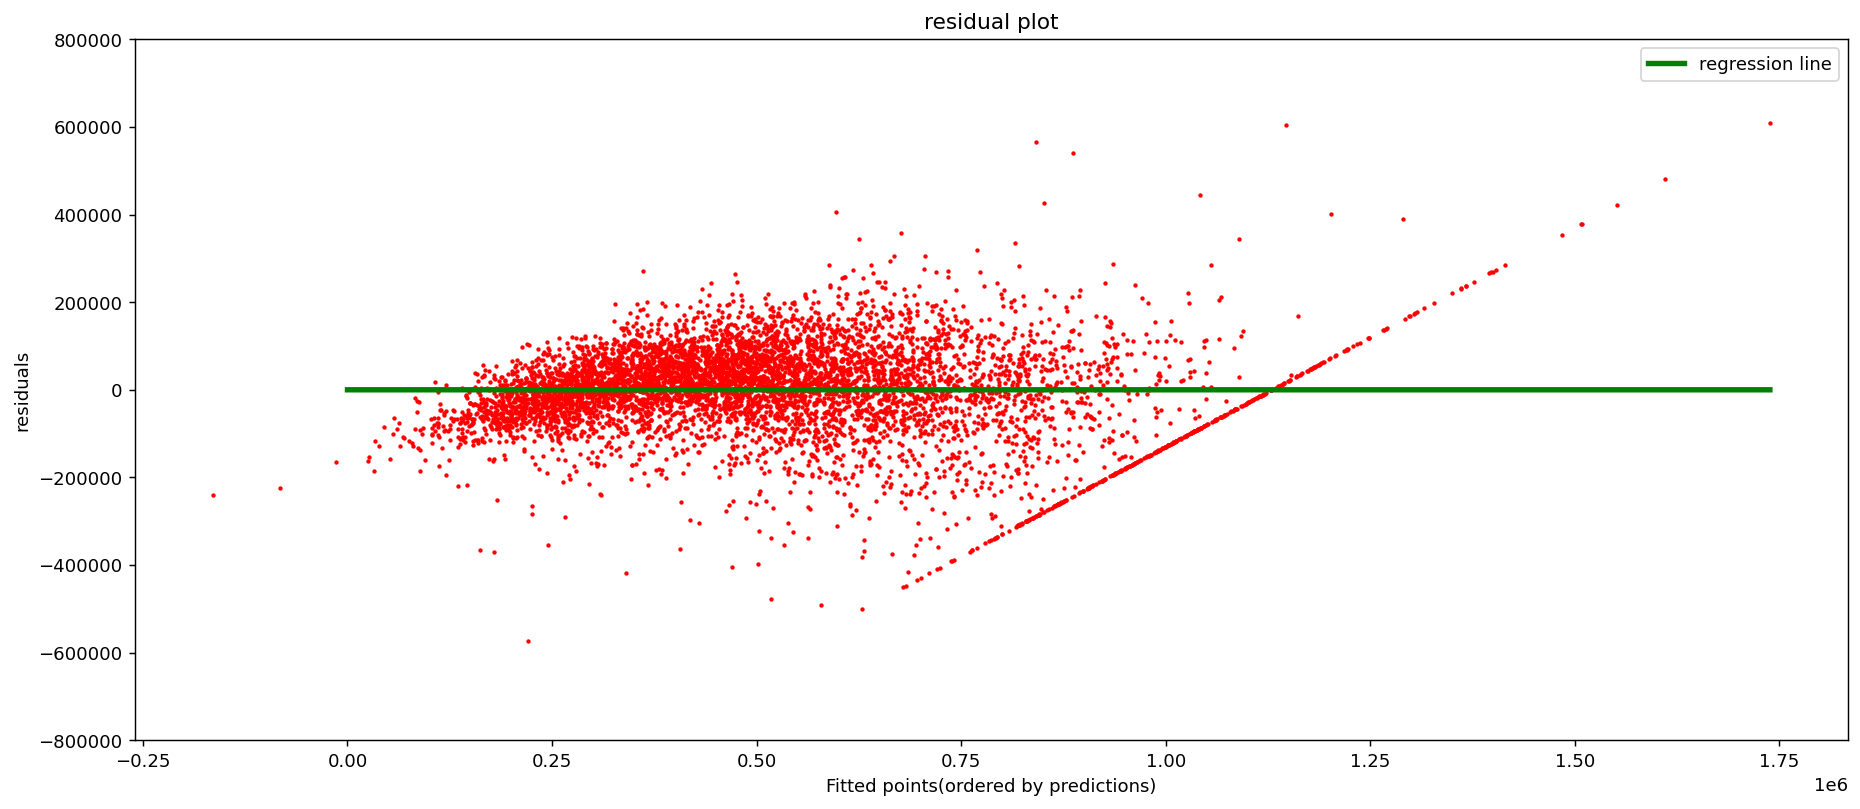

In [70]:
plt.figure(dpi=130, figsize=(17,7))
plt.scatter(residual_table['predictions'], residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted points(ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

In [71]:
# neither cone shape nor pipe shape, densely populated between -200000 to 200000, some outliers

### Distribution of errors

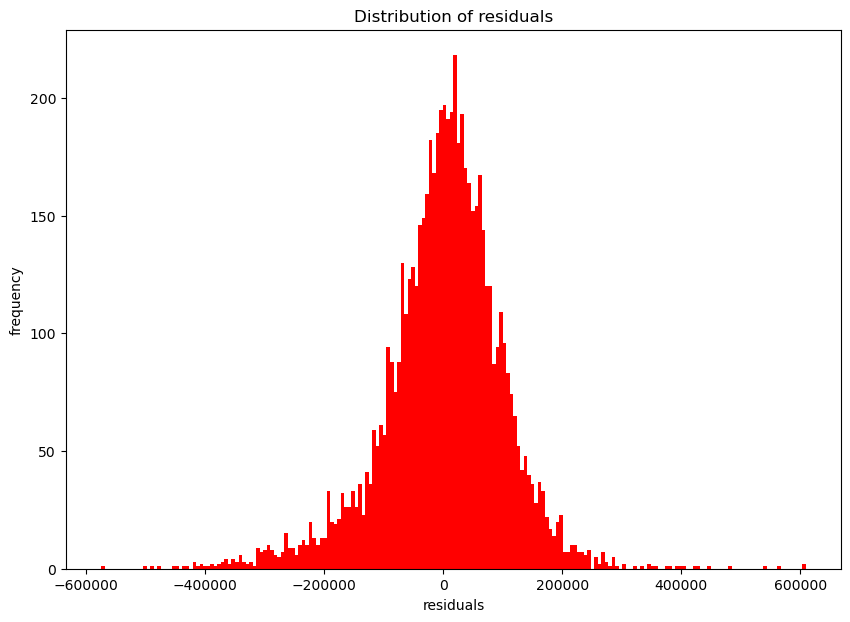

In [72]:
plt.figure(dpi=100, figsize=(10,7))
plt.hist(residual_table['residuals'], color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of residuals')
plt.show()

In [73]:
# the residuals follow normal distribution

### Model coefficients

In [74]:
coef_table=pd.DataFrame({'column': x_train.columns, 'coefficients': lr.coef_})
coef_table=coef_table.sort_values(by='coefficients')

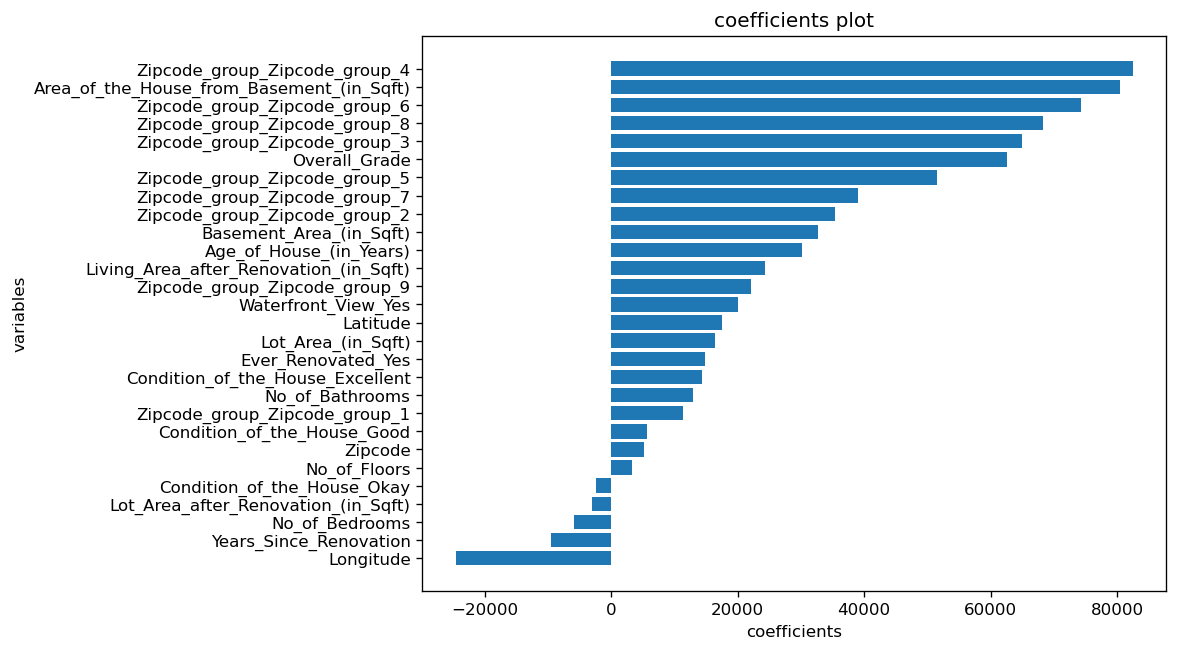

In [75]:
plt.figure(dpi=120, figsize=(8,6))
plt.barh(coef_table['column'],coef_table['coefficients'])
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('coefficients plot')
plt.show()

## On viewing the coefficient plot, we can infer the following:
### 1. Zipcode_group_4 is a significant location where prices are high.
### 2. Area of the house is highely correlated with sale price as expected.
### 3. On viewing the longitude and latitude coefficients, since the data is based on houses on north america, it tells us the houses of north east region are more expensive than other places.